# Testing the impact of different W computation methods in ariane

In [1]:
#import required libraries
import datetime
import numpy as np
import os
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
def get_data(section, starttime, endtime):
    final_section = mydata.variables['final_section'][:]
    final_transport = mydata.variables['final_transp'][:]
    transports = np.sum(np.where(final_section == section, final_transport, 0)) 
    return transports/(endtime-starttime+1)

In [27]:
starttime = 1
endtime = 720
sections = [0,2,3,4,5,6,7,8]

In [30]:
mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/W_test/neww_01mar19/ariane_positions_quantitative.nc')

new = np.zeros(8)

for i in range(len(new)):
    if sections[i] == 8:
        new[i] = sum(mydata.init_transp.values)/(endtime) - sum(new[:-1])
    else:
        new[i] = get_data(sections[i], starttime, endtime)

In [32]:
mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/W_test/oldw_01mar19/ariane_positions_quantitative.nc')

old = np.zeros(8)

for i in range(len(old)):
    if sections[i] == 8:
        old[i] = sum(mydata.init_transp.values)/(endtime) - sum(old[:-1])
    else:
        old[i] = get_data(sections[i], starttime, endtime)

In [33]:
mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01mar19/ariane_positions_quantitative.nc')

non = np.zeros(8)

for i in range(len(non)):
    if sections[i] == 8:
        non[i] = sum(mydata.init_transp.values)/(endtime) - sum(non[:-1])
    else:
        non[i] = get_data(sections[i], starttime, endtime)

<ipython-input-46-4618e85a6935>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['_','Meander','Admiralty','Deception','Rosario','San Juan','Haro','Surface','Lost'])


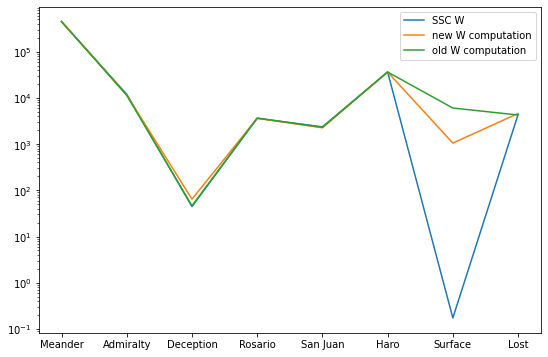

In [46]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
ax.plot(non,label='SSC W')
ax.plot(new,label='new W computation')
ax.plot(old,label='old W computation')
ax.set_yscale('log')
ax.set_xticklabels(['_','Meander','Admiralty','Deception','Rosario','San Juan','Haro','Surface','Lost'])
ax.legend()


<ipython-input-48-2cf100efa15b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['_','Admiralty','Deception','Rosario','San Juan','Haro','Surface','Lost'])


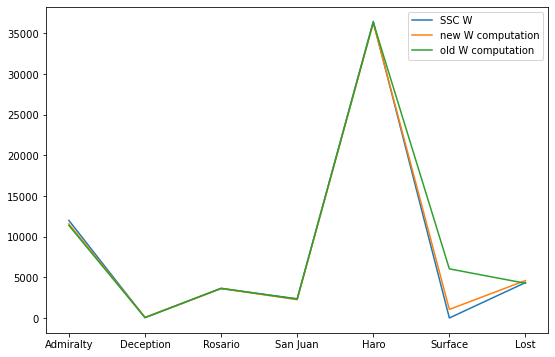

In [48]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
ax.plot(non[1:],label='SSC W')
ax.plot(new[1:],label='new W computation')
ax.plot(old[1:],label='old W computation')
# ax.set_yscale('log')
ax.set_xticklabels(['_','Admiralty','Deception','Rosario','San Juan','Haro','Surface','Lost'])
ax.legend()